# Class Imbalance

Necessary if your classes don't appear an equal number of times in your training data

In [2]:
import sys
import numpy
from matplotlib import pyplot
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import model_selection

sys.path.append("../")

from common import util

In [3]:
input_file = "data_imbalance.txt"
data = numpy.loadtxt(input_file, delimiter=",")
X, Y = data[:, :-1], data[:, -1]

class0 = X[Y == 0]
class1 = X[Y == 1]

## Visualizing the Input

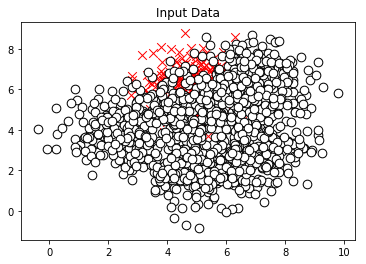

In [7]:
pyplot.figure()
pyplot.scatter(class0[:, 0], class0[:, 1], s=75, facecolors="red", edgecolors="black", linewidth=1, marker="x")
pyplot.scatter(class1[:, 0], class1[:, 1], s=75, facecolors="white", edgecolors="black", linewidth=1, marker="o")
pyplot.title("Input Data")
pyplot.show()

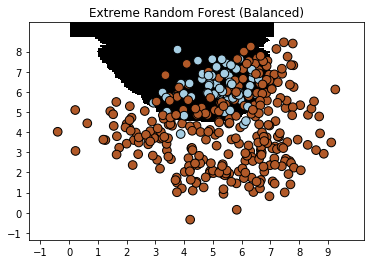

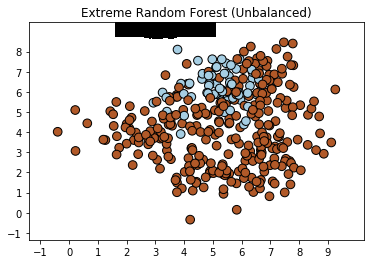

In [10]:
split = model_selection.train_test_split(X, Y, test_size=0.25, random_state=5)
feature_train, feature_test, class_train, class_test = split

balanced = ExtraTreesClassifier(n_estimators=100, max_depth=4, random_state=0, class_weight="balanced")
balanced.fit(feature_train, class_train)

unbalanced = ExtraTreesClassifier(n_estimators=100, max_depth=4, random_state=0)
unbalanced.fit(feature_train, class_train)

util.visualize_classifier(balanced, feature_test, class_test, "Extreme Random Forest (Balanced)")
util.visualize_classifier(unbalanced, feature_test, class_test, "Extreme Random Forest (Unbalanced)")